In [ ]:
from ecog_ts_gui import main
import os

In [ ]:
fs_dir = os.environ['SUBJECTS_DIR']
subj_file = 'ben_subjects/EC125_B22.nwb'
fpath = os.path.join(fs_dir,subj_file)

main(fpath)

In [7]:
import pynwb
import nwbext_ecog
import matplotlib.pyplot as plt
import os

Subject ID:  EC125
Anamotic names:
['lh_LHinsula_pial', 'lh_cingulate_pial', 'lh_insula_pial', 'lh_lOFC_pial', 'lh_lcingulate_pial', 'lh_ofc_pial', 'lh_pial', 'rh_insula_pial', 'rh_pial', 'rh_rOFC_pial', 'rh_rcingulate_pial']


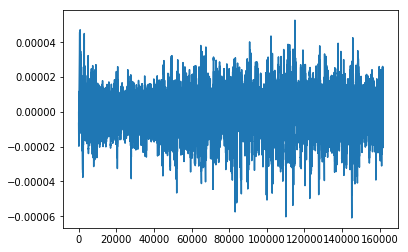

In [8]:
fs_dir = os.environ['SUBJECTS_DIR']
subj_file = 'ben_subjects/EC125_B22.nwb'
fpath = os.path.join(fs_dir,subj_file)

# Read NWB file
nwb = pynwb.NWBHDF5IO(fpath, 'r').read()

# Subject ID
subject_id = nwb.subject.subject_id
print('Subject ID: ', subject_id)

# Anatomic names
anatomic_names = list(nwb.subject.cortical_surfaces.surfaces.keys())
print('Anamotic names:')
print(anatomic_names)

# ECoG
ecog = nwb.acquisition['ECoG']
plt.plot(ecog.data[:,0])